# Quantum Spins

We are going consider a magnetic insulator, 
a Mott insulator. In this problem we have a valence electron per
atom, with very localized wave-functions. The Coulomb repulsion between
electrons on the same orbital is so strong, that electrons are bound to
their host atom, and cannot move. For this reason, charge disappears
from the equation, and the only remaining degree of freedom is the spin
of the electrons. The corresponding local state can therefore be either
$|\uparrow\rangle$ or $|\downarrow\rangle$. The only interaction taking
place is a process that “flips” two anti-aligned neighboring spins
$|\uparrow\rangle|\downarrow\rangle \rightarrow |\downarrow\rangle|\uparrow\rangle$.

Let us now consider a collection of spins residing on site of a
–one-dimensional for simplicity– lattice. An arbitrary state of
$N$-spins can be described by using the $S^z$ projection
($\uparrow,\downarrow$) of each spin as: $|s_1,s_2,..., s_N\rangle$. As
we can easily see, there are $2^N$ of such configurations.

Let us now consider a collection of spins residing on site of a
–one-dimensional for simplicity– lattice. An arbitrary state of
$N$-spins can be described by using the $S^z$ projection
($\uparrow,\downarrow$) of each spin as: $|s_1,s_2,..., s_N\rangle$. As
we can easily see, there are $2^N$ of such configurations.

We shall describe the interactions between neighboring spins using the
so-called Heisenberg Hamiltonian:

$$\hat{H}=\sum_{i=1}^{N-1} \hat{\mathbf{S}}_i \cdot \hat{\mathbf{S}}_{i+1}
$$

where $\hat{\mathbf{S}}_i = (\hat{S}^x,\hat{S}^y,\hat{S}^z)$ is the spin
operator acting on the spin on site $i$.

Since we are concerned about spins one-half, $S=1/2$, all these
operators have a $2\times2$ matrix representation, related to the
well-known Pauli matrices:

$$S^z = \left(
\begin{array}{cc}
1/2 & 0 \\
0 & -1/2
\end{array}
\right),
S^x = \left(
\begin{array}{cc}
0 & 1/2 \\
1/2 & 0
\end{array}
\right),
S^y = \left(
\begin{array}{cc}
0 & -i/2 \\
i/2 & 0
\end{array}
\right),
$$

These matrices act on two-dimensional vectors defined by the basis
states $|\uparrow\rangle$ and $|\downarrow\rangle$. It is useful to
introduce the identities:
$$\hat{S}^\pm = \left(\hat{S}^x \pm i \hat{S}^y\right),$$ where $S^+$
and $S^-$ are the spin raising and lowering operators. It is intuitively
easy to see why by looking at how they act on the basis states:
$\hat{S}^+|\downarrow\rangle = |\uparrow\rangle$ and
$\hat{S}^-|\uparrow\rangle = |\downarrow\rangle$. Their corresponding
$2\times2$ matrix representations are: $$S^+ = \left(
\begin{array}{cc}
0 & 1 \\
0 & 0
\end{array}
\right),
S^- = \left(
\begin{array}{cc}
0 & 0 \\
1 & 0
\end{array}
\right),
$$

We can now re-write the Hamiltonian (\[heisenberg\]) as:
$$\hat{H}=\sum_{i=1}^{N-1}
\hat{S}^z_i \hat{S}^z_{i+1} +
\frac{1}{2}\left[
\hat{S}^+_i \hat{S}^-_{i+1} +
\hat{S}^-_i \hat{S}^+_{i+1}
\right]
$$ The first term in this expression is diagonal and
does not flip spins. This is the so-called Ising term. The second term
is off-diagonal, and involves lowering and raising operators on
neighboring spins, and is responsible for flipping anti-aligned spins.
This is the “$XY$” part of the Hamiltonian.

The Heisenberg spin chain is a paradigmatic model in condensed matter.
Not only it is attractive due to its relative simplicity, but can also
describe real materials that can be studied experimentally. The
Heisenberg chain is also a prototypical integrable system, that can be
solved exactly by the Bethe Ansatz, and can be studied using
bosonization techniques and conformal field theory.

The Heisenberg spin chain is a paradigmatic model in condensed matter.
Not only it is attractive due to its relative simplicity, but can also
describe real materials that can be studied experimentally. The
Heisenberg chain is also a prototypical integrable system, that can be
solved exactly by the Bethe Ansatz, and can be studied using
bosonization techniques and conformal field theory.

In these lectures, we will be interested in obtaining its ground state
properties of this model by numerically solving the time-independent
Schrödinger equation: $$\hat{H}|\Psi\rangle = E|\Psi\rangle,$$ where $H$
is the Hamiltonian of the problem, $|\Psi\rangle$ its eigenstates, with
the corresponding eigenvalues, or energies $E$.

Exact diagonalization
=====================

![blocks](figures/fig_blocks.png)
#### Pictorial representation of the Hamiltonian building recursion explained in the text. At each step, the block size is increased by adding a spin at a time.

In this section we introduce a technique that will allow us to calculate
the ground state, and even excited states of small Heisenberg chains.
Exact Diagonalization (ED) is a conceptually simple technique which
basically consists of diagonalizing the Hamiltonian matrix by brute
force. Same as for the spin operators, the Hamiltonian also has a
corresponding matrix representation. In principle, if we are able to
compute all the matrix elements, we can use a linear algebra package to
diagonalize it and obtain all the eigenvalues and eigenvectors @lapack.

In these lectures we are going to follow a quite unconventional
procedure to describe how this technique works. It is important to point out that this
is a quite inefficient and impractical way to diagonalize the
Hamiltonian, and more sophisticated techniques are generally used in
practice.

Two-spin problem
----------------

The Hilbert space for the two-spin problem consists of four possible
configurations of two spins
$$\left\{ |\uparrow\uparrow\rangle,|\uparrow\downarrow\rangle,|\downarrow\uparrow\rangle,|\downarrow\downarrow\rangle \right\}$$

The problem is described by the Hamiltonian: $$\hat{H}=
\hat{S}^z_1 \hat{S}^z_2 +
\frac{1}{2}\left[
\hat{S}^+_1 \hat{S}^-_2 +
\hat{S}^-_1 \hat{S}^+_2
\right]$$

The corresponding matrix will have dimensions $4 \times 4$. In order to
compute this matrix we shall use some simple matrix algebra to first
obtain the single-site operators in the expanded Hilbert space. This is
done by following the following simple scheme: And operator $O_1$ acting
on the left spin, will have the following $4 \times 4$ matrix form:
$$\tilde{O}_1 = O_1 \otimes {1}_2
$$ Similarly, for an operator $O_2$ acting on the right
spin: $$\tilde{O}_2 = {1}_2 \otimes O_2
$$ where we introduced the $n \times n$ identity matrix
${1}_n$. The product of two operators acting on different sites
can be obtained as: $$\tilde{O}_{12} = O_1 \otimes O_2$$ It is easy to
see that the Hamiltonian matrix will be given by: $$H_{12}=
S^z \otimes S^z +
\frac{1}{2}\left[
S^+ \otimes S^- +
S^- \otimes S^+
\right]$$ where we used the single spin ($2 \times 2$) matrices $S^z$
and $S^\pm$. We leave as an exercise for the reader to show that the
final form of the matrix is:

$$H_{12} = \left(
\begin{array}{cccc}
1/4 & 0 & 0 & 0 \\
0 & -1/4 & 1/2 & 0 \\
0 & 1/2 & -1/4 & 0 \\
0 & 0 & 0 & 1/4 \\
\end{array}
\right),
$$

Obtaining the eigenvalues and eigenvectors is also a straightforward
exercise: two of them are already given, and the entire problem now
reduces to diagonalizing a two by two matrix. We therefore obtain the
well known result: The ground state
$|s\rangle = 1/\sqrt{2}\left[ |\uparrow\downarrow\rangle - |\downarrow\uparrow\rangle \right]$,
has energy $E_s=-3/4$, and the other three eigenstates
$\left\{|\uparrow\uparrow\rangle,|\downarrow\downarrow\rangle,1/\sqrt{2}\left[ |\uparrow\downarrow\rangle + |\downarrow\uparrow\rangle \right] \right\}$
form a multiplet with energy $E_t=1/4$.

Many spins
----------

Imagine now that we add a third spin to the right of our two spins. We
can use the previous result to obtain the new $8 \times 8$ Hamiltonian
matrix as: $$H_{3}=
H_{2} \otimes {1}_2 +
\tilde{S}^z_2 \otimes S^z +
\frac{1}{2}\left[
\tilde{S}^+_2 \otimes S^- +
\tilde{S}^-_2 \otimes S^+
\right]$$ Here we used the single spin $S^z_1$, $S^\pm_1$, and the
\`tilde\` matrices defined in Eqs.(\[tildeL\]) and (\[tildeR\]):
$$\tilde{S}^z_2 = {1}_2 \otimes S^z,$$ and
$$\tilde{S}^\pm_2 = {1}_2 \otimes S^\pm,$$

It is easy to see that this leads to a recursion scheme to construct the
$2^i \times 2^i$ Hamiltonian matrix the $i^\mathrm{th}$ step as:

$$H_{i}=
H_{i-1} \otimes {1}_2 +
\tilde{S}^z_{i-1} \otimes S^z +
\frac{1}{2}\left[
\tilde{S}^+_{i-1} \otimes S^- +
\tilde{S}^-_{i-1} \otimes S^+
\right]$$

with $$\tilde{S}^z_{i-1} = {1}_{2^{i-2}} \otimes S^z,$$ and
$$\tilde{S}^\pm_{i-1} = {1}_{2^{i-2}} \otimes S^\pm,$$

This recursion algorithm can be visualized as a left ‘block’, to which
we add new ‘sites’ or spins to the right, one at a time, as shown in
Fig.\[fig:block\].The block has a ‘block Hamiltonian’, $H_L$, that is
iteratively built by connecting to the new spins through the
corresponding interaction terms.


In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

# PARAMETERS
nsites = 8

#Single site operators
sz0 = np.zeros(shape=(2,2)) # single site Sz
splus0 = np.zeros(shape=(2,2)) # single site S+
sz0[0,0]         = -0.5
sz0[1,1]         =  0.5
splus0[1,0]      =  1.0

term_szsz = np.zeros(shape=(4,4)) #auxiliary matrix to store Sz.Sz
term_szsz = np.kron(sz0,sz0)

term_spsm = np.zeros(shape=(4,4)) #auxiliary matrix to store 1/2 S+.S-
term_spsm = np.kron(splus0,np.transpose(splus0))*0.5
term_spsm += np.transpose(term_spsm)

h12 = term_szsz+term_spsm

H = np.zeros(shape=(2,2))
for i in range(1,nsites):

    diml = 2**(i-1)        # 2^i
    dim = diml*2
    
    print ("ADDING SITE ",i," DIML= ",diml)

    Ileft = np.eye(diml)
    Iright = np.eye(2)

    # We add the term for the interaction S_i.S_{i+1}

    aux = np.zeros(shape=(dim,dim))
    aux = np.kron(H,Iright)
    H = aux

    H = H + np.kron(Ileft,h12)

w, v = np.linalg.eigh(H) #Diagonalize the matrix
print(w)

ADDING SITE  1  DIML=  1
ADDING SITE  2  DIML=  2
ADDING SITE  3  DIML=  4
ADDING SITE  4  DIML=  8
ADDING SITE  5  DIML=  16
ADDING SITE  6  DIML=  32
ADDING SITE  7  DIML=  64
[-3.3749326  -2.98224049 -2.98224049 -2.98224049 -2.50372907 -2.50372907
 -2.50372907 -2.33380386 -2.10812936 -2.10812936 -2.10812936 -2.0567576
 -2.0567576  -2.0567576  -1.91720711 -1.84883362 -1.84883362 -1.84883362
 -1.8316135  -1.8316135  -1.8316135  -1.8316135  -1.8316135  -1.67470637
 -1.67470637 -1.67470637 -1.64520463 -1.46566636 -1.46566636 -1.46566636
 -1.46566636 -1.46566636 -1.42441526 -1.42441526 -1.42441526 -1.39501087
 -1.22827398 -1.22827398 -1.22827398 -1.22563298 -1.22563298 -1.22563298
 -1.22563298 -1.22563298 -1.12098189 -1.03810412 -1.03810412 -1.03810412
 -1.03810412 -1.03810412 -0.99669162 -0.99669162 -0.99669162 -0.98276266
 -0.98276266 -0.98276266 -0.80242001 -0.80242001 -0.80242001 -0.80242001
 -0.80242001 -0.72918536 -0.72918536 -0.72918536 -0.72745015 -0.72745015
 -0.72745015 -0.6984

0.1 -0.13440094427539903
0.2 -0.2745106220291552
0.30000000000000004 -0.4192870911355526
0.4 -0.5675111660216381
0.5 -0.7178307681913986
0.6 -0.8688168893699839
0.7000000000000001 -1.0190260819336356
0.8 -1.167063391675081
0.9 -1.3116396792650657
1.0 -1.4516183124034265
1.1 -1.5860479724220509
1.2000000000000002 -1.714180378979959
1.3000000000000003 -1.8354736576118653
1.4000000000000001 -1.949583532313432
1.5000000000000002 -2.056345366485309
1.6 -2.155750314045565
1.7000000000000002 -2.2479186067208534
1.8000000000000003 -2.333072470791156
1.9000000000000001 -2.4115105081323973
2.0 -2.483584724611145
2.1 -2.549680826427394
2.2 -2.610201969519424
2.3000000000000003 -2.6655558432015374
2.4000000000000004 -2.716144781467402
2.5000000000000004 -2.7623584995787276
2.6 -2.8045690239636674
2.7 -2.8431273972140207
2.8000000000000003 -2.878361778912821
2.9000000000000004 -2.910576613895644
3.0000000000000004 -2.940052593457619
3.1 -2.9670471865212606
3.2 -2.9917955639500233
3.3000000000000003

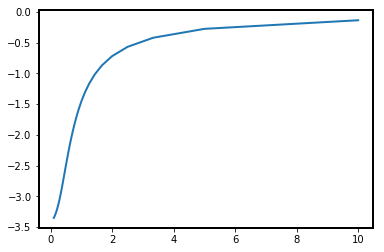

In [2]:
from matplotlib import pyplot
pyplot.rcParams['axes.linewidth'] = 2 #set the value globally
%matplotlib inline

Beta = np.arange(0.1,10,0.1)
et = np.copy(Beta)
n = 0
for x in Beta:
    p = np.exp(-w*x)
    z = np.sum(p)
    et[n] = np.dot(w,p)/z
    print (x,et[n])    
    n+=1

pyplot.plot(1/Beta,et,lw=2);
     
    
    
        

#### Challenge 12.1:

Compute the energy and specific heat of the spin chain with $L=12$ as a function of temperature, for $T < 4$.

# A practical exact diagonalization algorithm

1. Initialization: Topology of the lattice, neighbors, and signs. 
2. Contruction of a basis suitable for the problem. 
3. Constuction of the matrix element of the Hamiltonian. 
4. Diagonalization of the matrix. 
5. Calculation of observables or expectation values.

As we shall see below, we are going to need the concept of “binary
word”. A binary word is the binary representation of an integer (in
powers of ‘two’, i.e. $n=\sum_{i}b_{i}.2^{i}$), and consist of a
sequence of ‘bits’. A bit $b_{i}$ in the binary basis correspond to our
digits in the decimal system, and can assumme the values ‘zero’ or
‘one’. At this stage we consider appropriate to introduce the logical
operators `AND, OR, XOR`. The binary operators act between bits and
their multiplication tables are listed below

**AND** | 0 | 1
:---:|:---:|:---:
**0** | 0 | 0
**1** | 0 | 1

**OR** | 0 | 1
:---:|:---:|:---:
**0** | 0 | 1
**1** | 1 | 1

**XOR** | 0 | 1
:---:|:---:|:---:
**0** | 0 | 1
**1** | 1 | 0


The bit manipulation is a very useful tool, and most of the programming
languages provide the needed commands.

## Initilalization and definitions

In the program, it is convenient to store in arrays all those quantities
that will be used more frequently. In particular, we must determine the
topology of the cluster, labeling the sites, and storing the components
of the lattice vectors. We must also generate arrays with the nearest
neighbors, and the next-nearest neighbors, according to our needs.

## Construction of the basis

Memory limitations impose severe restrictions on the size of the
clusters that can be studied with this method. To understand this point,
note that although the lowest energy state can be written in the
$\{|\phi
_{n}\rangle \}$ basis as
$|\psi _{0}\rangle =\sum_{m}c_{m}|\phi _{m}\rangle $, this expression is
of no practical use unless $|\phi _{m}\rangle $ itself is expressed in a
convenient basis to which the Hamiltonian can be easily applied. A
natural orthonormal basis for fermion systems is the occupation number
representation, describing all the possible distributions of $N_{e}$
electrons over $N$ sites, while for spin systems it is covenient to work
in a basis where the $S_{z}$ is defined at every site, schematically
represented as $|n\rangle =|\uparrow \downarrow \uparrow ...\rangle $.
The size of this type of basis set
grows exponentially with the system size. In practice this problem can be
considerably alleviated by the use of symmetries of the Hamiltonian that
reduces the matrix to a block-form. The most obvious symmetry is the
number of particles in the problem which is usually conserved at least
for fermionic problems. The total projection of the spin
$S_{total}^{z}$, is also a good quantum number. For translationally
invariant problems, the total momentum $\mathbf{k%
}$ of the system is also conserved introducing a reduction of $1/N$ in
the number of states (this does not hold for models with open boundary
conditions or explicit disorder). In addition, several Hamiltonians have
additional symmetries. On a square lattice, rotations in $\pi /2$ about
a given site, spin inversion, and reflections with respect to the
lattice axis are good quantum numbers (although care must be taken in
their implementation since some of these operations are combinations of
others and thus not independent). 

In the following we shall consider a spin-1/2 Heisenberg chain as a
practical example. In this model it is useful to represent the spins
pointing in the ‘up’ direction by a digit ‘1’, and the down-spins by a
‘0’. Following this rule, a state in the $S^{z}$ basis can be
represented by a sequence of ones and zeroes, i.e., a “binary word”.
Thus, two Néel configurations in the 4-site chain can be seen as
$$\begin{aligned}
\mid \uparrow \downarrow \uparrow \downarrow \rangle \equiv |1010\rangle , \\
\mid \downarrow \uparrow \downarrow \uparrow \rangle \equiv |0101\rangle .\end{aligned}$$
Once the up-spins have been placed the whole configuration has been
uniquely determined since the remaining sites can only be occupied by
down-spins. The resulting binary number can be easily converted into
integers $i\equiv
\sum_{l}b_{l}.2^{l}$, where the summation is over all the sites of the
lattice, and $b_{l}$ can be $1$ or $0$. For example:
$$\begin{array}{lllll}
2^{3} & 2^{2} & 2^{1} & 2^{0} &  \\
1 & 0 & 1 & 0 & \rightarrow 2^{1}+2^{3}=10, \\
0 & 1 & 0 & 1 & \rightarrow 2^{0}+2^{2}=5.
\end{array}$$

Using the above convention, we can construct the whole basis for the
given problem. However, we must consider the memory limitations of our
computer, introducing some symetries to make the problem more tractable.
The symetries are operations that commute with the Hamiltonian, allowing
us to divide the basis in subspaces with well defined quantum numbers.
By means of similarity transformations we can generate a sequence of
smaller matrices along the diagonal (i.e. the Hamiltonian matrix is
“block diagonal”), and each of them can be diagonalized independently.
For fermionic systems, the simplest symmetries are associated to the
conservation of the number of particles and the projection
$S_{total}^{z}$ of the total spin in the $z$ direction. In the spin-1/2
Heisenberg model, a matrix with $2^{N}\times 2^{N}$ elements can be
reduced to $2S+1$ smaller matrices, corresponding to the projections $%
m=(N_{\uparrow }-N_{\downarrow })/2=-S,-S+1,...,S-1,S$, with $S=N/2$.

The dimension of each of these subspaces is obtained from the
combinatory number $\left(
\begin{array}{c}
N \\
N_{\uparrow }
\end{array}
\right) = \frac{N!}{N_{\uparrow }!N_{\downarrow }!}$.

#### Example: 4-site Heisenberg chain

The total basis has
$2^{4}=16$ states that can be grouped in
$4+1=5$ subspaces with well defined values of the quantum
number $m=S^z$. The dimensions of these subspaces are:

 m | dimension 
:--:|:--:
-2 | 1 
-1 | 4 
0 | 6 
2 | 4 
1 | 1 
 
Since we know that the ground state of the Hilbert
chain is a singlet, we are only interested in the subspace with
</span>$S_{total}^{z}=m=0$<span>. For our example, this subspace is
given by (in increasing order): </span> 
$$\begin{eqnarray}
\mid \downarrow \downarrow \uparrow \uparrow \rangle & \equiv &|0011\rangle
\equiv |3\rangle , \\
\mid \downarrow \uparrow \downarrow \uparrow \rangle &\equiv &|0101\rangle
\equiv |5\rangle , \\
\mid \downarrow \uparrow \uparrow \downarrow \rangle &\equiv &|0110\rangle
\equiv |6\rangle , \\
\mid \uparrow \downarrow \downarrow \uparrow \rangle &\equiv &|1001\rangle
\equiv |9\rangle , \\
\mid \uparrow \downarrow \uparrow \downarrow \rangle &\equiv &|1010\rangle
\equiv |10\rangle , \\
\mid \uparrow \uparrow \downarrow \downarrow \rangle &\equiv &|1010\rangle
\equiv |12\rangle .
\end{eqnarray}
$$

Generating the possible configurations of $N$ up-spins (or
spinless fermions) in $L$ sites is equivalent to the problem of
generating the corresponding combinations of zeroes and ones in
lexicographic order.

## Construction of the Hamiltonian matrix elements

We now have to address the problem of generating all the Hamiltonian matrix elements
. These are obtained by the application of the
Hamiltonian on each state of the basis $|\phi \rangle $, generating all
the values
$H_{\phi ,\phi ^{\prime }}=\langle \phi ^{\prime }|{{\hat{H}}}%
|\phi \rangle $. We illustrate this procedure in the following
pseudocode:

&ensp;&ensp;&ensp;&ensp;**for** each term ${\hat{H}_i}$ of the Hamiltonian ${\hat{H}}$

&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;**for** all the states $|\phi\rangle $ in the basis

&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;$\hat{H}_i|\phi\rangle = \langle \phi^{\prime }|{\hat{H}_i}|\phi\rangle |\phi^{\prime }\rangle  $ 

&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
$H_{\phi,\phi^{\prime }}=H_{\phi,\phi^{\prime }} + \langle \phi^{\prime }|{\hat{H}_i}|\phi\rangle $

&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;**end for**

&ensp;&ensp;&ensp;&ensp;**end for**

As the states are representated by binary words, the spin operators (as
well as the creation and destructions operators) can be be easily
implemented using the logical operators `AND, OR, XOR`.

As a practical example let us consider the spin-1/2 Heisenberg
Hamiltonian on the 4-sites chain:
$${{\hat{H}}}=J\sum_{i=0}^{3}\mathbf{S}_{i}.\mathbf{S}_{i+1}=J%
\sum_{i=0}^{3}S_{i}^{z}.S_{i+1}^{z}+\frac{J}{2}%
\sum_{i=0}^{3}(S_{i}^{+}S_{i+1}^{-}+S_{i}^{-}S_{i+1}^{+}), $$

with $\mathbf{S}_{4}=\mathbf{S}_{0}$, due to the periodic boundary
conditions. To evaluate the matrix elements in the basis (\[basis0\]) we
must apply each term of ${{\hat{H}}}$ on such states. The first term is
called Ising term, and is diagonal in this basis (also called Ising
basis). The last terms, or fluctuation terms, give strictly off-diagonal
contributions to the matrix in this representation (when symmetries are
considered, they can also have diagonal contributions). These
fluctuations cause an exchange in the spin orientation between neighbors
with opposite spins, e.g. $\uparrow \downarrow \rightarrow $
$\downarrow \uparrow $. The way to implement spin-flip operations of
this kind on the computer is defining new ‘masks’. A mask for this
operation is a binary number with ‘zeroes’ everywhere, except in the
positions of the spins to be flipped, e.g 00..0110...00. Then, the
logical operator `XOR` is used between the initial state and the mask to
invert the bits (spins) at the positions indicated by the mask. For
example, (0101)$\mathtt{.}$`XOR.`(1100)=(1001), i.e., 5`.XOR.`12=9. It
is useful to store all the masks for a given geometry in memory,
generating them immediately after the tables for the sites and neighbors.

<span>In the Heisenberg model the spin flips can be implemented using
masks, with ‘zeroes’ everywhere, except in the positions of the spins to
be flipped. To illustrate this let us show the effect of the
off-diagonal terms on one of the Néel configurations:</span>
$$\begin{eqnarray}
S_{0}^{+}S_{1}^{-}\,+S_{0}^{-}S_{1}^{+}\,|0101\rangle &\equiv &(0011)\mathtt{%
.XOR.}(0101)=3\mathtt{.XOR.}5=(0110)=6\equiv \,|0110\rangle , \\
S_{1}^{+}S_{2}^{-}+S_{1}^{-}S_{2}^{+}\,\,|0101\rangle &\equiv &(0110)\mathtt{%
.XOR.}(0101)=6\mathtt{.XOR.}5=(0011)=3\equiv \,|0011\rangle , \\
S_{2}^{+}S_{3}^{-}+S_{2}^{-}S_{3}^{+}\,\,|0101\rangle &\equiv &(1100)\mathtt{%
.XOR.}(0101)=12\mathtt{.XOR.}5=(1001)=9\equiv \,|1001\rangle , \\
S_{3}^{+}S_{0}^{-}\,+S_{3}^{-}S_{0}^{+}|0101\rangle &\equiv &(1001)\mathtt{%
.XOR.}(0101)=9\mathtt{.XOR.}5=(1100)=12\equiv \,|1100\rangle .%
\end{eqnarray}$$

<span>After applying the Hamiltonian (\[h4\]) on our basis states, the
reader can verify as an exercise that we obtain </span>
$$\begin{eqnarray}
{{\hat{H}}}\,|0101\rangle &=&-J\,|0101\rangle +\frac{J}{2}\left[
\,|1100\rangle +\,|1001\rangle +\,|0011\rangle +\,|0110\rangle \right] , \\
{{\hat{H}}}\,|1010\rangle &=&-J\,|1010\rangle +\frac{J}{2}\left[
\,|1100\rangle +\,|1001\rangle +\,|0011\rangle +\,|0110\rangle \right] , \\
{{\hat{H}}}\,|0011\rangle &=&\frac{J}{2}\left[ \,\,|0101\rangle
+\,|1010\rangle \right] , \\
{{\hat{H}}}\,|0110\rangle &=&\frac{J}{2}\left[ \,\,|0101\rangle
+\,|1010\rangle \right] , \\
{{\hat{H}}}\,|1001\rangle &=&\frac{J}{2}\left[ \,|0101\rangle +\,|1010\rangle
\right] , \\
{{\hat{H}}}\,|1100\rangle &=&\frac{J}{2}\left[ \,|0101\rangle +\,|1010\rangle
\right] .%
\end{eqnarray}$$

<span>The resulting matrix for the operator </span>$\hat{H}$<span>in the
</span>$S^{z}$<span> representation is: </span> $$H=J\left(
\begin{array}{llllll}
0 & 1/2 & 0 & 0 & 1/2 & 0 \\
1/2 & -1 & 1/2 & 1/2 & 0 & 1/2 \\
0 & 1/2 & 0 & 0 & 1/2 & 0 \\
0 & 1/2 & 0 & 0 & 1/2 & 0 \\
1/2 & 0 & 1/2 & 1/2 & -1 & 1/2 \\
0 & 1/2 & 0 & 0 & 1/2 & 0
\end{array}
\right) .  $$

In [8]:
class BoundaryCondition:
    RBC, PBC = range(2)

class Direction:
    RIGHT, TOP, LEFT, BOTTOM = range(4)
    
L = 8
Nup = 2
maxdim = 2**L
bc = BoundaryCondition.PBC

#  Tables for energy

hdiag = np.zeros(4) # Diagonal energies
hflip = np.zeros(4) # off-diagonal terms

hdiag[0] = +0.25
hdiag[1] = -0.25
hdiag[2] = -0.25
hdiag[3] = +0.25

hflip[0] = 0.
hflip[1] = 0.5
hflip[2] = 0.5
hflip[3] = 0.

#hflip *= 2
#hdiag *= 0.

# Lattice geometry  (1D chain)

nn = np.zeros(shape=(L,4), dtype=np.int16)
for i in range(L):
    nn[i, Direction.RIGHT] = i-1
    nn[i, Direction.LEFT] = i+1

if(bc == BoundaryCondition.RBC):   # Open Boundary Conditions
    nn[0, Direction.RIGHT] = -1    # This means error
    nn[L-1, Direction.LEFT] = -1
else:                              # Periodic Boundary Conditions
    nn[0, Direction.RIGHT] = L-1   # We close the ring
    nn[L-1, Direction.LEFT] = 0
  
# We build basis

basis = []

dim = 0
for state in range(maxdim):
    basis.append(state)
    dim += 1

print ("Basis:")
print (basis)

# We build Hamiltonian matrix

H = np.zeros(shape=(dim,dim))

def IBITS(n,i):
    return ((n >> i) & 1)

for i in range(dim):
    state = basis[i]

    # Diagonal term
    for site_i in range(L):
        site_j = nn[site_i, Direction.RIGHT]
        if(site_j != -1):   # This would happen for open boundary conditions
            two_sites  = IBITS(state,site_i) | (IBITS(state,site_j) << 1)
            value = hdiag[two_sites]
            H[i,i] += value

        
for i in range(dim):
    state = basis[i]

    # Off-diagonal term
    for site_i in range(L):
        site_j = nn[site_i, Direction.RIGHT]

        if(site_j != -1):
            mask = (1 << site_i) | (1 << site_j)
            two_sites  = IBITS(state,site_i) | (IBITS(state,site_j) << 1)
            value = hflip[two_sites]
            if(value != 0.):
                new_state = (state ^ mask)
                j = new_state
                H[i,j] += value

print(H)
d, v = np.linalg.eigh(H) #Diagonalize the matrix 
print("===================================================================================================================")
print(d)


Basis:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

In [6]:
# Using quantum number conservation : Sz

basis = []

dim = 0
for state in range(maxdim):
    n_ones = 0
    for bit in range(L):
        n_ones += IBITS(state,bit)
    print (state,n_ones)
    if(n_ones == Nup):
        basis.append(state)
        dim += 1

print ("Dim=",dim)
print ("Basis:")
print (basis)

#hflip[:] *= 2
# We build Hamiltonian matrix

H = np.zeros(shape=(dim,dim))

def IBITS(n,i):
    return ((n >> i) & 1)

for i in range(dim):
    state = basis[i]

    # Diagonal term
    for site_i in range(L):
        site_j = nn[site_i, Direction.RIGHT]
        if(site_j != -1):   # This would happen for open boundary conditions
            two_sites  = IBITS(state,site_i) | (IBITS(state,site_j) << 1)
            value = hdiag[two_sites]
            H[i,i] += value


def bisect(state, basis):  
    # Binary search, only works in a sorted list of integers
    # state : integer we seek
    # basis : list of sorted integers in increasing order
    # ret_val : return value, position on the list, -1 if not found
    
    ret_val = -1
    dim = len(basis)
    
#    for i in range(dim):
#        if(state == basis[i]):
#            return i

    origin = 0
    end = dim-1
    middle = (origin+end)/2

    while(1):
        index_old = middle

        middle = (origin+end)//2

        if(state < basis[middle]):
            end = middle
        else:
            origin = middle

        if(basis[middle] == state):
            break

        if(middle == index_old):
            if(middle == end):
                end = end - 1
            else:
                origin = origin + 1

    ret_val = middle
    return ret_val           

            
for i in range(dim):
    state = basis[i]

    # Off-diagonal term
    for site_i in range(L):
        site_j = nn[site_i, Direction.RIGHT]

        if(site_j != -1):
            mask = (1 << site_i) | (1 << site_j)
            two_sites  = IBITS(state,site_i) | (IBITS(state,site_j) << 1)
            value = hflip[two_sites]
            if(value != 0.):
                new_state = (state ^ mask)
                j = bisect(new_state, basis)
                H[i,j] += value

print(H)
d, v = np.linalg.eigh(H) #Diagonalize the matrix 
print(d,np.min(d))
print(v[:,0])

0 0
1 1
2 1
3 2
4 1
5 2
6 2
7 3
8 1
9 2
10 2
11 3
12 2
13 3
14 3
15 4
Dim= 6
Basis:
[3, 5, 6, 9, 10, 12]
[[ 0.25  0.5   0.    0.    0.    0.  ]
 [ 0.5  -0.75  0.5   0.5   0.    0.  ]
 [ 0.    0.5  -0.25  0.    0.5   0.  ]
 [ 0.    0.5   0.   -0.25  0.5   0.  ]
 [ 0.    0.    0.5   0.5  -0.75  0.5 ]
 [ 0.    0.    0.    0.    0.5   0.25]]
[-1.6160254  -0.95710678 -0.25        0.1160254   0.45710678  0.75      ] -1.6160254037844386
[ 0.14942925 -0.55767754  0.40824829  0.40824829 -0.55767754  0.14942925]


Obtaining the ground-state: Lanczos diagonalization
---------------------------------------------------

Once we have a superblock matrix, we can apply a library routine to
obtain the ground state of the superblock $|\Psi\rangle$. The two
algorithms widely used for this purpose are the Lanczos and Davidson
diagonalization. Both are explained to great extent in Ref.@noack, so we
refer the reader to this material for further information. In these
notes we will briefly explain the Lanczos procedure.

The basic idea of the Lanczos method is that a special basis can be constructed
where the Hamiltonian has a tridiagonal representation. This is carried
out iteratively as shown below. First, it is necessary to select an
arbitrary seed vector $|\phi _{0}\rangle $ in the Hilbert space of the
model being studied. If we are seeking the ground-state of the model,
then it is necessary that the overlap between the actual ground-state
$|\psi
_{0}\rangle $, and the initial state $|\phi _{0}\rangle $ be nonzero. If
no “a priori” information about the ground state is known, this
requirement is usually easily satisfied by selecting an initial state
with *randomly* chosen coefficients in the working basis that is being
used. If some other information of the ground state is known, like its
total momentum and spin, then it is convenient to initiate the
iterations with a state already belonging to the subspace having those
quantum numbers (and still with random coefficients within this
subspace).

After $|\phi _{0}\rangle $ is selected, define a new vector by applying
the Hamiltonian ${{\hat{H}}}$, over the initial state. Subtracting the
projection over $|\phi _{0}\rangle $, we obtain
$$|\phi _{1}\rangle ={{\hat{H}}}|\phi _{0}\rangle -\frac{{\langle }\phi _{0}|{{%
\hat{H}}}|{\phi }_{0}{\rangle }}{\langle \phi _{0}|\phi _{0}\rangle }|\phi
_{0}\rangle ,$$ that satisfies $\langle \phi _{0}|\phi _{1}\rangle =0$.
Now, we can construct a new state that is orthogonal to the previous two
as,
$$|\phi _{2}\rangle ={{\hat{H}}}|\phi _{1}\rangle -{\frac{{\langle \phi _{1}|{%
\hat{H}}|\phi _{1}\rangle }}{{\langle \phi _{1}|\phi _{1}\rangle }}}|\phi
_{1}\rangle -{\frac{{\langle \phi _{1}|\phi _{1}\rangle }}{{\langle \phi
_{0}|\phi _{0}\rangle }}}|\phi _{0}\rangle .$$ It can be easily checked
that $\langle \phi _{0}|\phi _{2}\rangle
=\langle \phi _{1}|\phi _{2}\rangle =0$. The procedure can be
generalized by defining an orthogonal basis recursively as,
$$|\phi _{n+1}\rangle ={{\hat{H}}}|\phi _{n}\rangle -a_{n}|\phi _{n}\rangle
-b_{n}^{2}|\phi _{n-1}\rangle ,$$ where $n=0,1,2,...$, and the
coefficients are given by
$$a_{n}={\frac{{\langle \phi _{n}|{\hat{H}}|\phi _{n}\rangle }}{{\langle \phi
_{n}|\phi _{n}\rangle }}},\qquad b_{n}^{2}={\frac{{\langle \phi _{n}|\phi
_{n}\rangle }}{{\langle \phi _{n-1}|\phi _{n-1}\rangle }}},$$
supplemented by $b_{0}=0$, $|\phi _{-1}\rangle =0$. In this basis, it
can be shown that the Hamiltonian matrix becomes, $$H=\left(
\begin{array}{lllll}
a_{0} & b_{1} & 0 & 0 & ... \\
b_{1} & a_{1} & b_{2} & 0 & ... \\
0 & b_{2} & a_{2} & b_{3} & ... \\
0 & 0 & b_{3} & a_{3} & ... \\
\vdots
{} &
\vdots
&
\vdots
&
\vdots
&
\end{array}
\right)$$ i.e. it is tridiagonal as expected. Once in this form the
matrix can be diagonalized easily using standard library subroutines.
However, note that to diagonalize completely a Hamiltonian on a finite
cluster, a number of iterations equal to the size of the Hilbert space
(or the subspace under consideration) are needed. In practice this would
demand a considerable amount of CPU time. However, one of the advantages
of this technique is that accurate enough information about the ground
state of the problem can be obtained after a small number of iterations
(typically of the order of $\sim 100$ or less).

Another way to formulate the problem is by obtaining the tridiagonal
form of the Hamiltonian starting from a Krylov basis, which is spanned
by the vectors
$$\left\{|\phi_0\rangle,\hat{H}|\phi_0\rangle,\hat{H}^2|\phi_0\rangle,...,\hat{H}^n|\phi_0\rangle\right\}$$
and asking that each vector be orthogonal to the previous two. Notice
that each new iteration of the process requires one application of the
Hamiltonian. Most of the time this simple procedure works for practical
purposes, but care must be payed to the possibility of losing
orthogonality between the basis vectors. This may happen due to the
finite machine precision. In that case, a re-orthogonalization procedure
may be required.

Notice that the new super-Hamiltonian matrix has dimensions
$D_L D_R d^2 \times D_L D_R d^2$. This could be a large matrix. In
state-of-the-art simulations with a large number of states, one does not
build this matrix in memory explicitly, but applies the operators to the
state directly in the diagonalization routine.

In [66]:
def lanczos(m, seed, maxiter, tol, use_seed, calc_gs, force_maxiter = False):
    x1 = seed
    x2 = seed
    gs = seed
    a = np.zeros(100)
    b = np.zeros(100)
    z = np.zeros((100,100))
    lvectors = []
    control_max = maxiter;

    if(maxiter == -1):
        force_maxiter = False

    if(control_max == 0):
        gs = 1
        maxiter = 1
        return(e0,gs)
    
    x1[:] = 0
    x2[:] = 0
    gs[:] = 0
    maxiter = 0
    a[:] = 0.0
    b[:] = 0.0
    if(use_seed):
        x1 = seed
    else :
        x1 = np.random.random(x1.shape[0])*2-1.

    b[0] = np.sqrt(np.dot(x1,x1))
    x1 = x1 / b[0]
    x2[:] = 0
    b[0] = 1.

    e0 = 9999
    nmax = min(99, gs.shape[0])
    for iter in range(1,nmax+1):
        eini = e0
        if(b[iter - 1] != 0.):
            aux = x1
            x1 = -b[iter-1] * x2
            x2 = aux / b[iter-1]

        aux = np.dot(m,x2)
        x1 = x1 + aux
        a[iter] = np.dot(x1, x2)
        x1 = x1 - x2*a[iter]
        b[iter] = np.sqrt(np.dot(x1, x1))
        lvectors.append(x2)                                          

        z.resize((iter+1,iter+1))
        z[:,:] = 0
        for i in range(0,iter-1):
            z[i,i+1] = b[i+1]
            z[i+1,i] = b[i+1]
            z[i,i] = a[i+1]
        z[iter-1,iter-1]=a[iter]
        d, v = np.linalg.eig(z)
        col = 0
        n = 0
        e0 = 9999
        for e in d:
            if(e < e0):
                e0 = e
                col = n
            n+=1
        e0 = d[col]
        print ("Iter = ",iter," Ener = ",e0)
        if((force_maxiter and iter >= control_max) or (iter >= gs.shape[0] or iter == 99 or abs(b[iter]) < tol) or \
            ((not force_maxiter) and abs(eini-e0) <= tol)):
            # converged
            gs = 0.
            for i in range(0,iter):
                gs += v[i,col]*lvectors[i]
            print ("E0 = ", e0, np.sqrt(np.dot(gs,gs)))
            maxiter = iter
            return(e0,gs) # We return with ground states energy


In [67]:
seed = np.zeros(H.shape[0])

In [68]:
e0, gs = lanczos(H,seed,6,1.e-5,False,False)

Iter =  1  Ener =  -0.6848415206892902
Iter =  2  Ener =  -1.9335584929208487
Iter =  3  Ener =  -1.9939600915319768
Iter =  4  Ener =  -1.999999999999999
E0 =  -1.999999999999999 0.9999999999999997


In [69]:
print(gs)

[ 0.28867513 -0.57735027  0.28867513  0.28867513 -0.57735027  0.28867513]


In [70]:
print(np.dot(gs,gs))

0.9999999999999994
